# Monte Carlo Methods

This notebook contains all of the Monte Carlo algorithms used trhoughout this thesis.

In [283]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.integrate import quad
%matplotlib inline

## Example for Monte Carlo Integration

We are trying to estimate
$$
\int_0^1 [\cos(50x)+sin(20x)]^2 dx
$$
where: 
* $h(x)= [\cos(50x)+sin(20x)]^2$,
* $f(X)= 1, x \sim U(0,1)$.

In [370]:
def MCI(h, f_samples, n):
    """Perform Monte Carlo Integration to estimate the expectation of H(X) using n samples drawn from f(X)

    Args:
        h (callable): The function h(x) to be integrated.
        f_samples (callable): n samples from the probability distribution f(X)
        n(int): # of samples
        
    Returns:
        estimate: estimate value of the expectation of h(X) using Monte Carlo Integration
    """
    
    values = h(f_samples)
    mu = np.average(values)
    error =  np.sqrt(np.sum((values - mu)**2))/n
    
    return mu, error

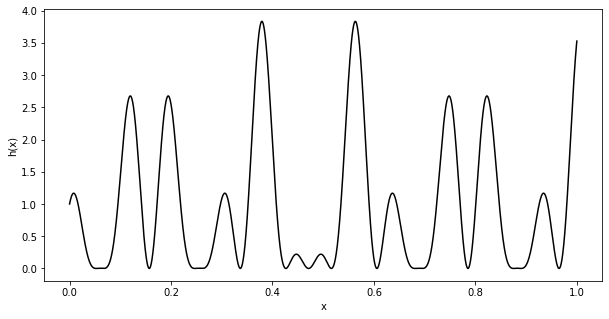

In [371]:
#Define and chart target function
def h_MC(x):
    return (np.cos(50*x) + np.sin(20*x))**2

x = np.linspace(0,1,10000)

plt.figure(figsize=(10, 5))
plt.plot(x,h(x),color='black' )
plt.xlabel('x')
plt.ylabel('h(x)')
plt.show()

In [374]:
n_MCI = 10000
n_values_MCI = np.arange(2, n_MCI+1)
estimates_MCI = []
upper_bounds_MCI = []
lower_bounds_MCI = []
for k in n_values_MCI:
    f_MC = stats.uniform(0,1).rvs(k)
    mu_MCI, error_MCI = MCI(h_MC,f_MC, k)
    
    CI = 2*error_MCI
    upper_MCI = mu_MCI + CI
    lower_MCI = mu_MCI - CI
    
    estimates_MCI.append(mu_MCI)
    upper_bounds_MCI.append(upper_MCI)
    lower_bounds_MCI.append(lower_MCI)

Result of integration: 0.9652009360501453
Estimated error: 1.8542214725442152e-10
Average of MC approximations: 0.9652299298208336


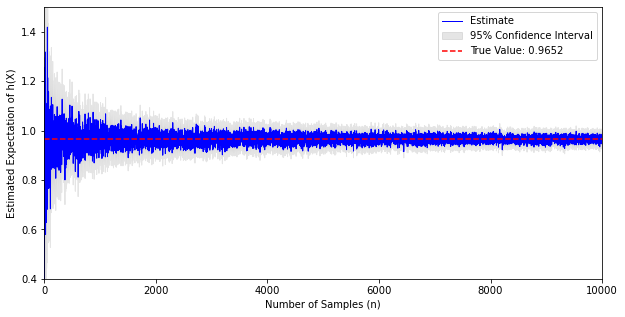

In [375]:
#Calculate exact result and compare with MX approximation
result_MCI, error_MCI2= quad(h_MC, 0, 1)

print("Result of integration:", result_MCI)
print("Estimated error:", error_MCI2)
print("Average of MC approximations:",np.mean(estimates))


# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(n_values_MCI, estimates_MCI, label='Estimate', linewidth=1, color='blue')
plt.xlim(0,n)
plt.ylim(0.4,1.5)
plt.fill_between(n_values_MCI, lower_bounds_MCI, upper_bounds_MCI, color='grey', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Number of Samples (n)')
plt.ylabel('Estimated Expectation of h(X)')
plt.grid(False)

# Add horizontal line for the true value
plt.axhline(y=result_MCI, color='red', linestyle='--', label=f'True Value: {result_MCI:.4f}')
plt.legend()
plt.show()

## Example of Importance Sampling

We are trying to estimate 
$$\int_0^{10} \frac{1}{10} e^{-2 |x-5|} dx$$
where:
* $h(x) = e^{-2 |x-5|}$,
* $f(x) = \frac{1}{10}$, $x \sim U(0,10)$
* $g(X) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}(x-5)^2}$

In [376]:
#Define and chart target function
def IS(h,f,g, g_samples, n):
    """Perform Importance Sampling to estimate the expectation of h(x)*f(x) using n samples drawn from g(X)

    Args:
        h(callable): The function h(x) to be integrated.
        f(callable): The function f(x) to calculate the importance weights
        g(callable): The function g(x) to calculate the importance weights
        g_samples (callable): n samples from the probability distribution g(X)
        n(int): number of samples
        
    Returns:
        estimate: estimate value of the expectation of h(X) using Monte Carlo Integration
    """
    
    weights = f(g_samples) / g(g_samples)
    values = weights * h(g_samples)    
    
    mu = np.average(values)
    error = np.sqrt(np.sum((values - mu)**2))/n
    
    return mu, error

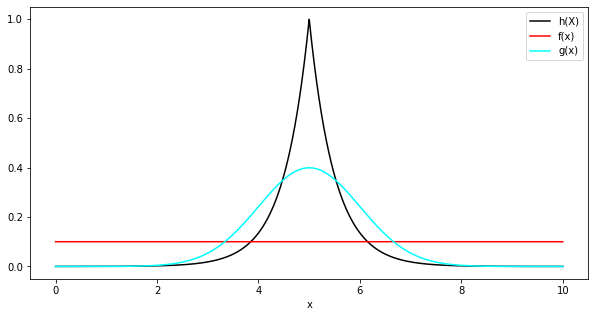

In [417]:
#Define the functions
def h_IS(x):
    return np.exp(-2*np.abs(x-5))*10
def f_IS(x):
    return stats.uniform.pdf(x,loc=0,scale=10)

def g_IS(x):
    return stats.norm.pdf(x, loc=5, scale =1)

#Plot the functions
x = np.linspace(0,10,10000)

plt.figure(figsize=(10, 5))
plt.plot(x,h_IS(x)/10,color='black', label = 'h(X)')
plt.plot(x,f_IS(x), color='red', label = 'f(x)')
plt.plot(x,g_IS(x), color='cyan', label='g(x)')
plt.xlim(-0.5,10.5)
plt.legend()
plt.xlabel('x')
plt.show()

In [418]:
n_IS = 1000
n_values_IS = np.arange(2, n_IS+1)

estimates_MC = []
upper_bounds_MC = []
lower_bounds_MC = []
estimates_IS = []
upper_bounds_IS = []
lower_bounds_IS = []

for k in n_values_IS:
    #Calculate MC approximation
    f_IS_Samples = stats.uniform(0,10).rvs(k)
    mu_MC, error_MC = MCI(h_IS,f_IS_Samples,k)

    CI_MC = 2*error_MC
    upper_MC = mu_MC + CI_MC
    lower_MC = mu_MC - CI_MC
    
    estimates_MC.append(mu_MC)
    upper_bounds_MC.append(upper_MC)
    lower_bounds_MC.append(lower_MC)
    
    #Calculate IS approximation
    g_IS_samples = stats.norm(5,1).rvs(k)
    mu_IS, error_IS = IS(h_IS,f_IS,g_IS,g_IS_samples,k)
    
    CI_IS = 2*error_IS
    upper_IS = mu_IS + CI_IS
    lower_IS = mu_IS - CI_IS
    
    estimates_IS.append(mu_IS)
    upper_bounds_IS.append(upper_IS)
    lower_bounds_IS.append(lower_IS)
    

Result of integration: 0.999954600070238
Estimated error: 2.8421709430404007e-13
Average of MCI approximations: 1.0073673432982138
Average of IS approximations: 0.9999138074473714


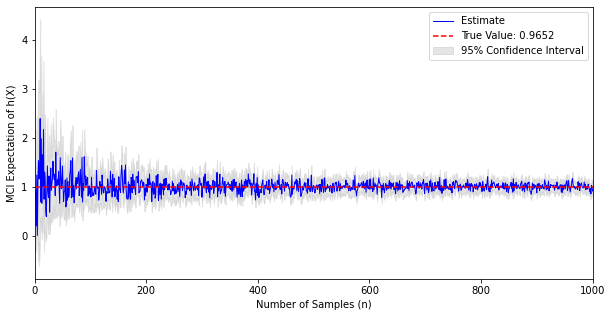

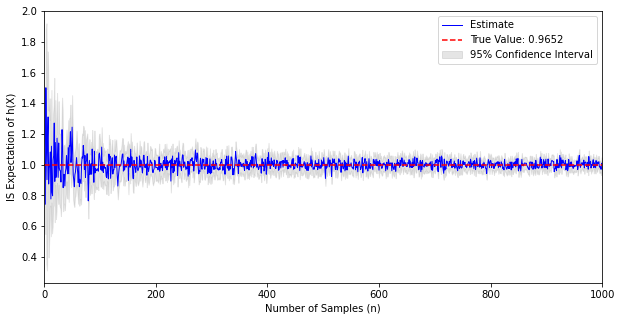

In [425]:
#Calculate exact result and compare with MX approximation
result_IS, error_IS2 = quad(h_IS, 0, 10)

print("Result of integration:", result_IS/10)
print("Estimated error:", error_IS2)
print("Average of MCI approximations:",np.mean(estimates_MC))
print("Average of IS approximations:",np.mean(estimates_IS))


# Plot MCI results
plt.figure(figsize=(10, 5))
plt.plot(n_values_IS, estimates_MC, label='Estimate', linewidth=1, color='blue')
plt.axhline(y=result_IS/10, color='red', linestyle='--', label=f'True Value: {result_MCI:.4f}')
plt.xlim(0,n_IS)
plt.fill_between(n_values_IS, lower_bounds_MC, upper_bounds_MC, color='grey', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Number of Samples (n)')
plt.ylabel('MCI Expectation of h(X)')
plt.grid(False)
plt.legend()


# Plot IS results
plt.figure(figsize=(10, 5))
plt.plot(n_values_IS, estimates_IS, label='Estimate', linewidth=1, color='blue')
plt.axhline(y=result_IS/10, color='red', linestyle='--', label=f'True Value: {result_MCI:.4f}')
plt.xlim(0,n_IS)
plt.fill_between(n_values_IS, lower_bounds_IS, upper_bounds_IS, color='grey', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Number of Samples (n)')
plt.ylabel('IS Expectation of h(X)')
plt.grid(False)
plt.legend()

plt.show()

## Example of Self Normalized Importance Sampling